## Results

## 0) Import

In [122]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

## 1) Data

In [123]:
df_results = pd.read_csv("./data/clusters_results.csv")
df_results 

,country,exports,health,imports,income,inflation,child_mort,Cluster_kmeans,Cluster_AggClu,Cluster_dbscan,Cluster_GM
0,Afghanistan,10.0,7.58,44.9,1610,9.44,90.2,1,1,-1,2
1,Albania,28.0,6.55,48.6,9930,4.49,16.6,0,0,0,0
2,Algeria,38.4,4.17,31.4,12900,16.10,27.3,0,0,-1,0
3,Angola,62.3,2.85,42.9,5900,22.40,119.0,1,1,-1,2
4,Antigua and Barbuda,45.5,6.03,58.9,19100,1.44,10.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,46.6,5.25,52.7,2950,2.62,29.2,0,0,0,0
163,Venezuela,28.5,4.91,17.6,16500,45.90,17.1,0,0,-1,2
164,Vietnam,72.0,6.84,80.2,4490,12.10,23.3,0,0,-1,0
165,Yemen,30.0,5.18,34.4,4480,23.60,56.3,1,1,-1,2


C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_13844\2173379010.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


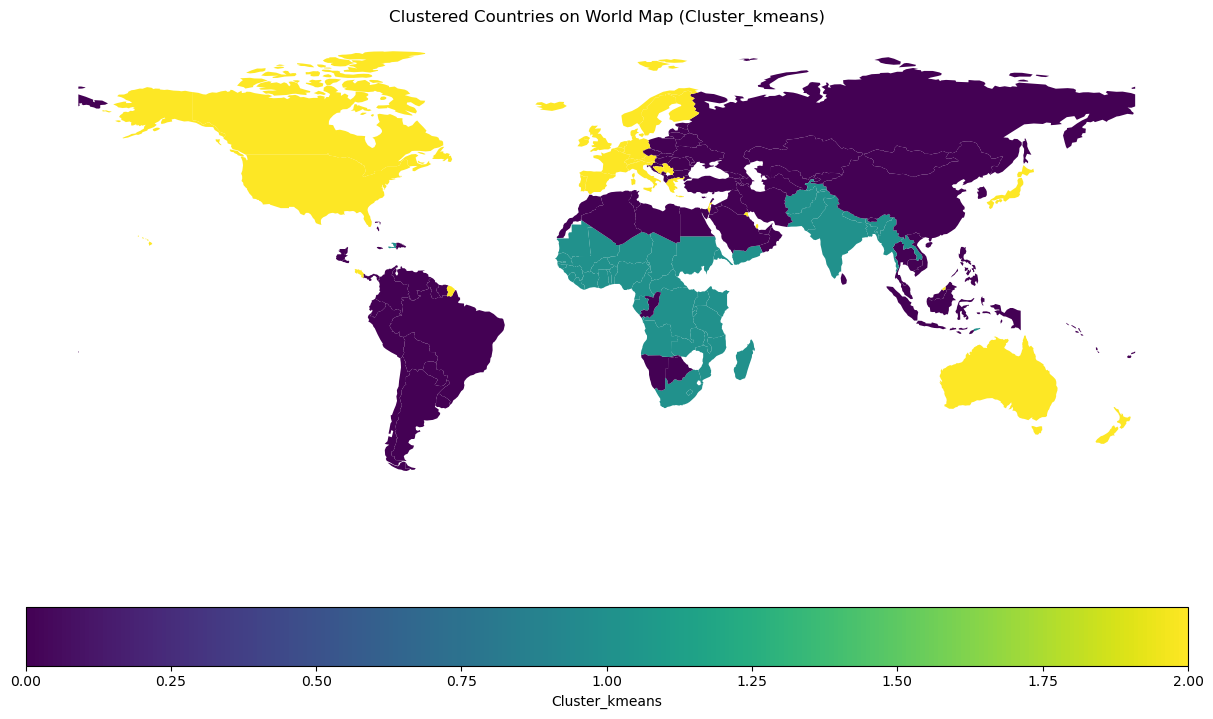

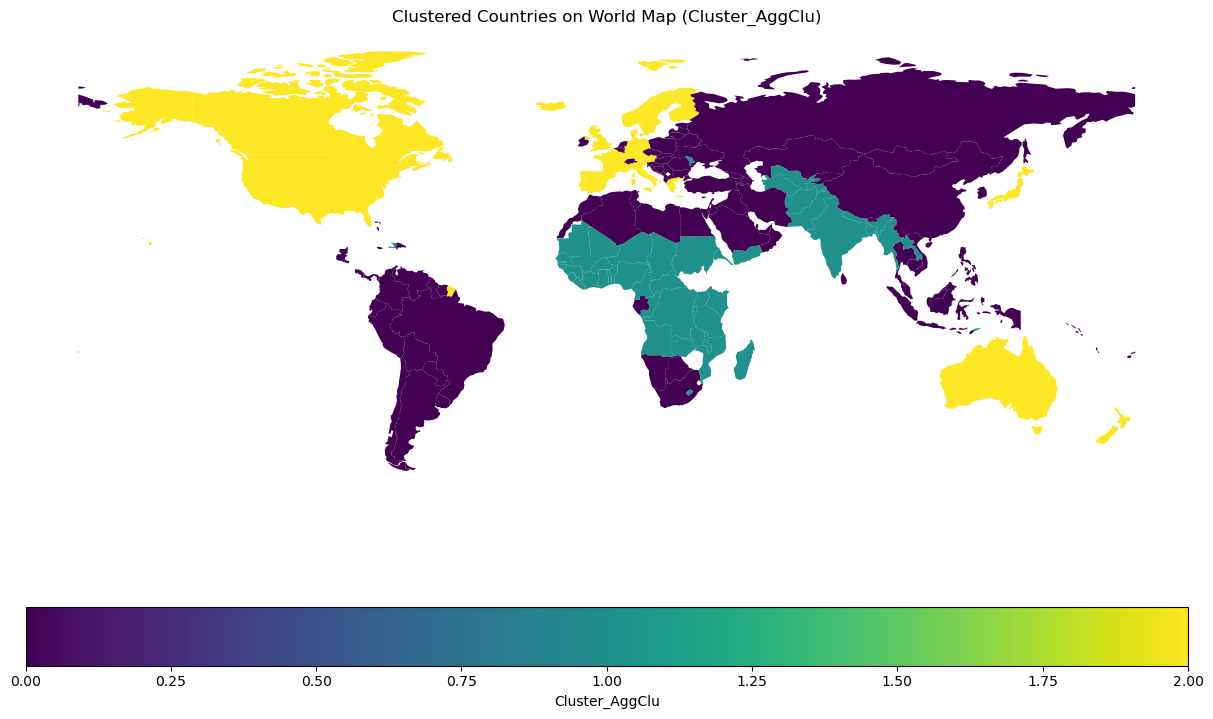

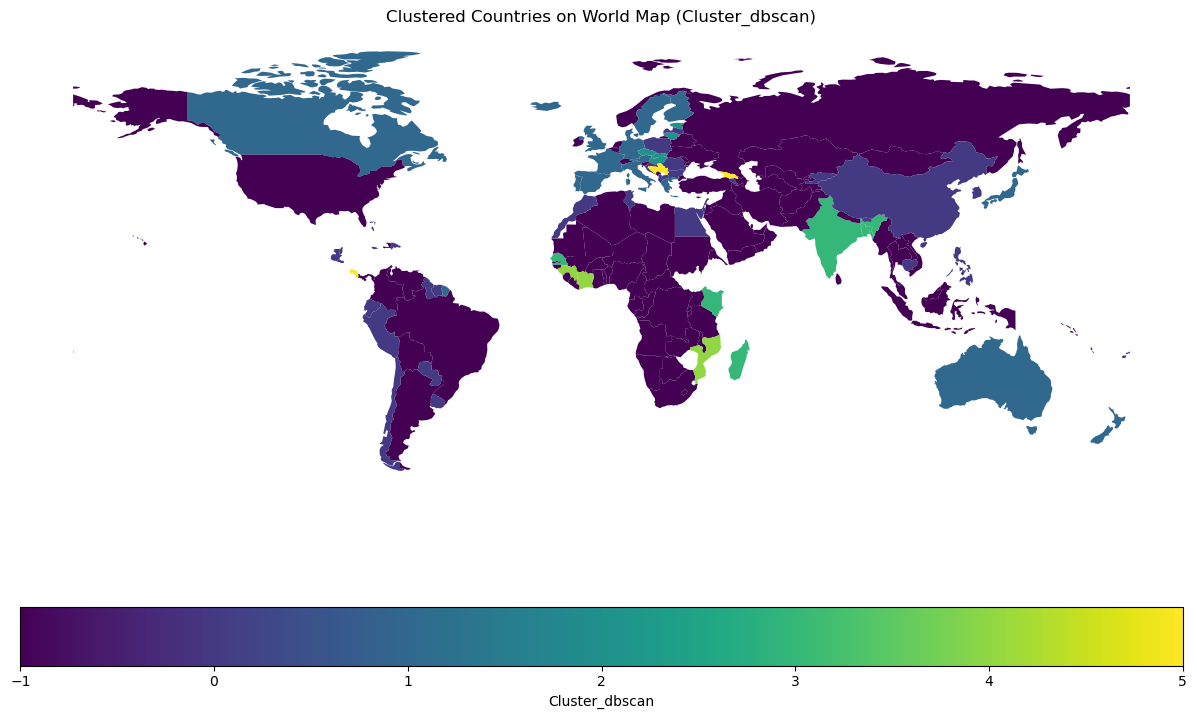

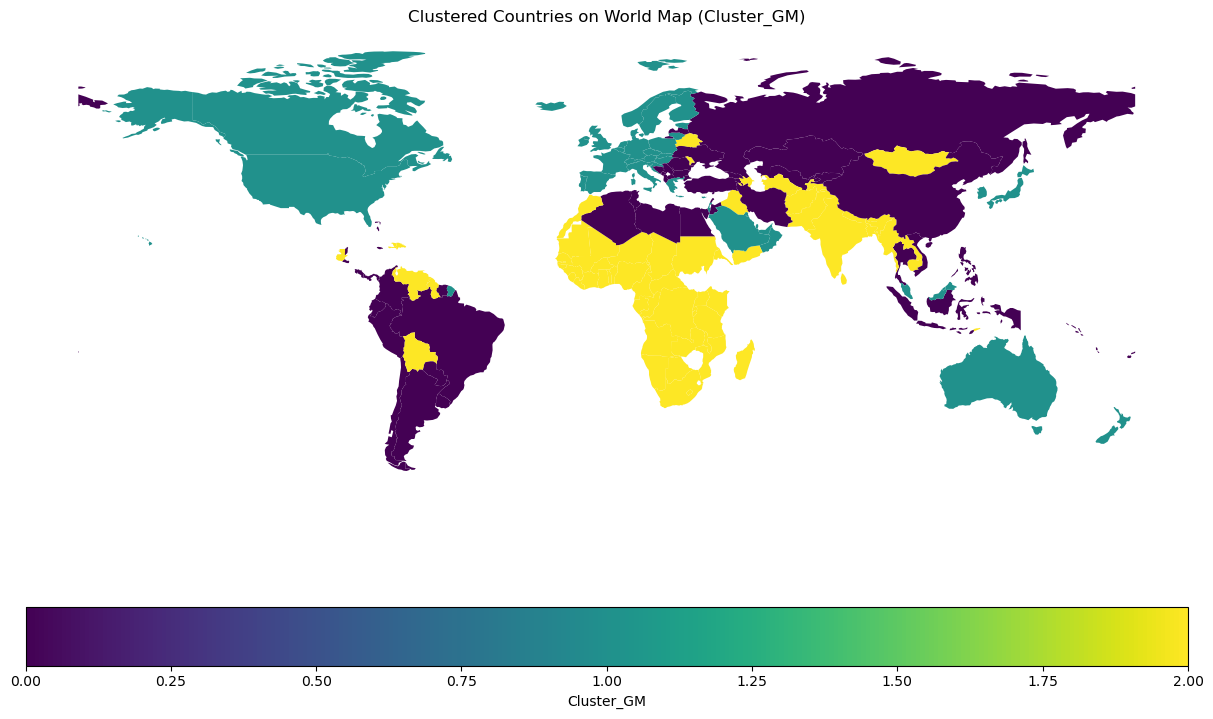

In [124]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with clustering information for each method
methods = ['Cluster_kmeans', 'Cluster_AggClu', 'Cluster_dbscan', 'Cluster_GM']
for method in methods:
    world_method = world.merge(df_results[['country', method]], left_on='name', right_on='country')
    
    # Plot choropleth map with cluster colors for each method
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world_method.plot(column=method, ax=ax, legend=True, cmap='viridis', 
                      legend_kwds={'label': method, 'orientation': 'horizontal'})
    ax.set_title(f'Clustered Countries on World Map ({method})')
    ax.set_axis_off()  # Turn off axis
    plt.show()

In [126]:
Cluster_kmeans_names = {0: "Peut avoir besoin d’aide", 1: "À besoin d’aide", 2: "Pas d’aide nécéssaire"}
Cluster_AggClu_names = {0: "Peut avoir besoin d’aide", 1: "À besoin d’aide", 2: "Pas d’aide nécéssaire"}
Cluster_GM_names = {0: "Peut avoir besoin d’aide", 1: "Pas d’aide nécéssaire", 2: "À besoin d’aide"}

df_results['Cluster_kmeans'] = df_results['Cluster_kmeans'].map(Cluster_kmeans_names)
df_results['Cluster_AggClu'] = df_results['Cluster_AggClu'].map(Cluster_AggClu_names)
df_results['Cluster_GM'] = df_results['Cluster_GM'].map(Cluster_GM_names)

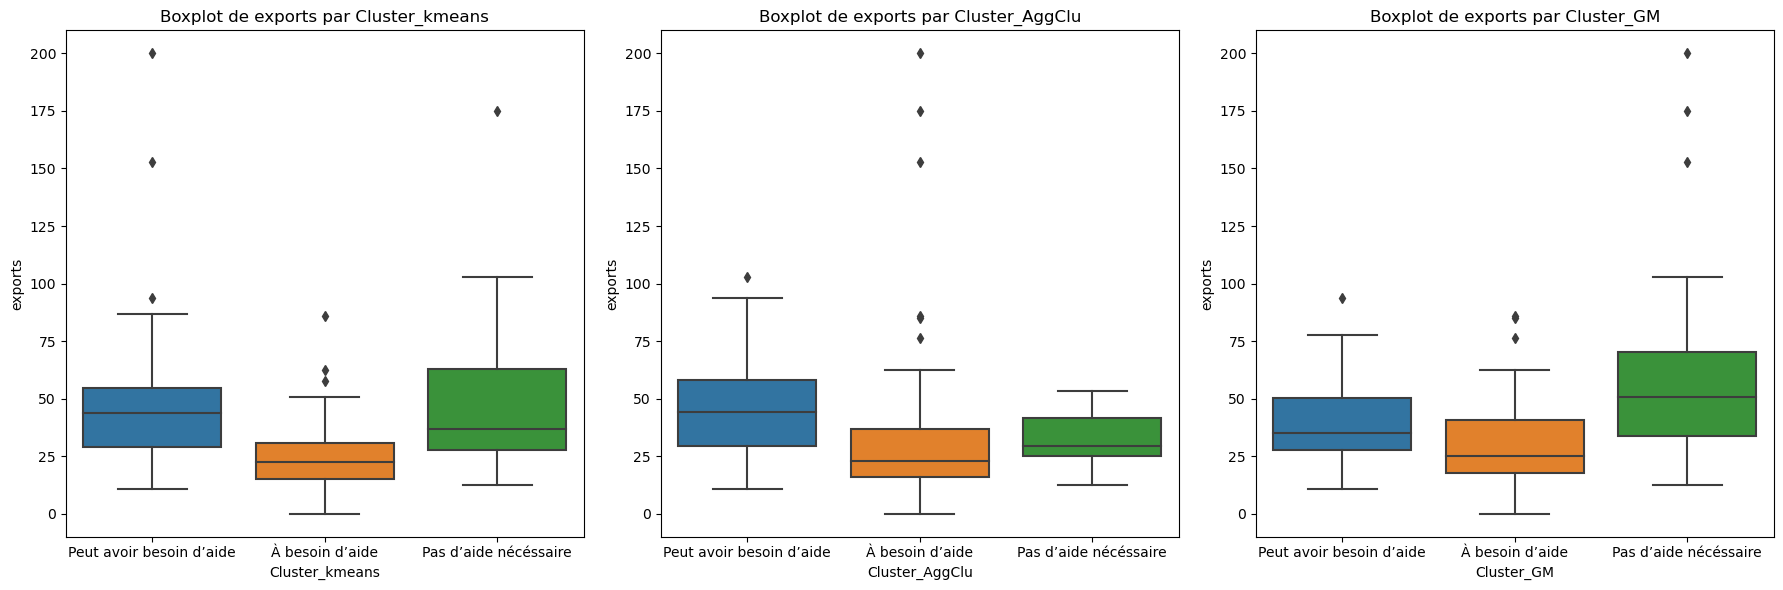

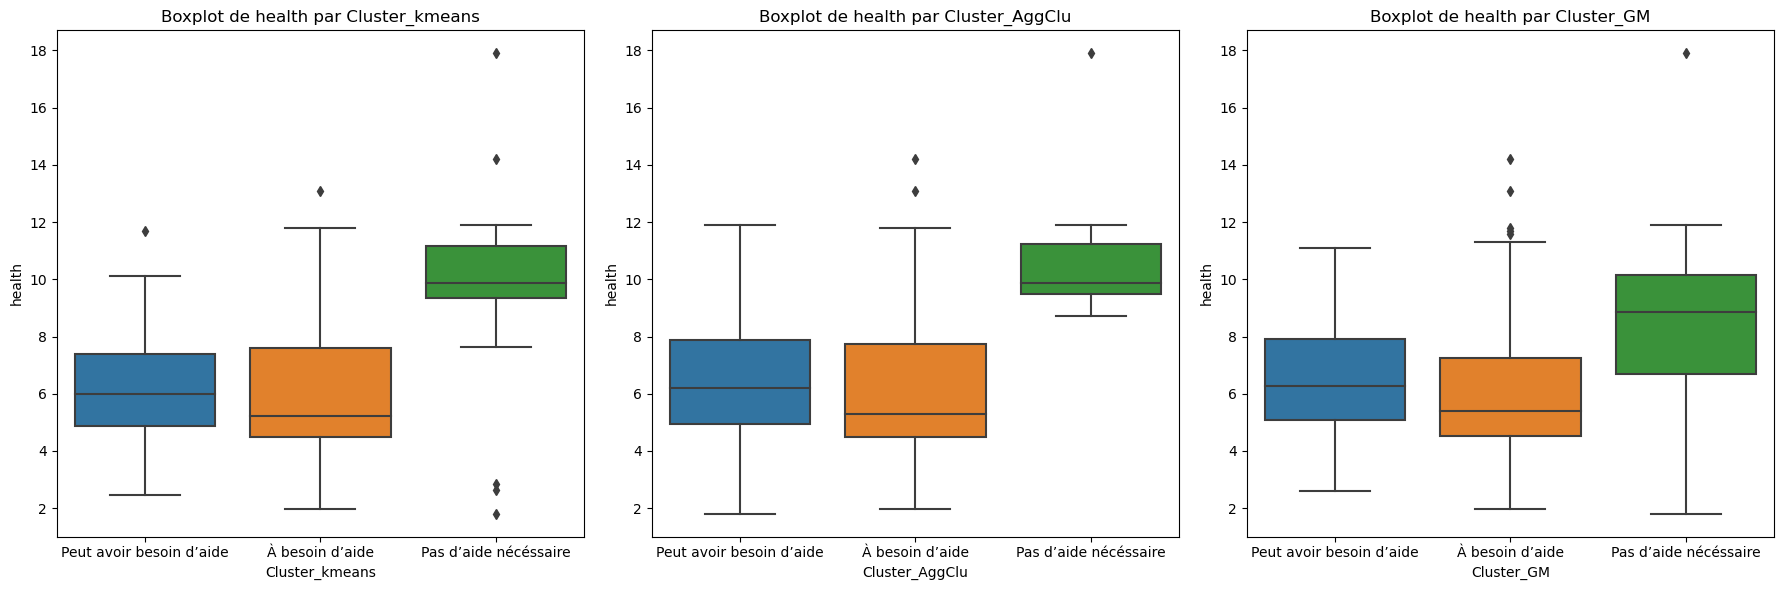

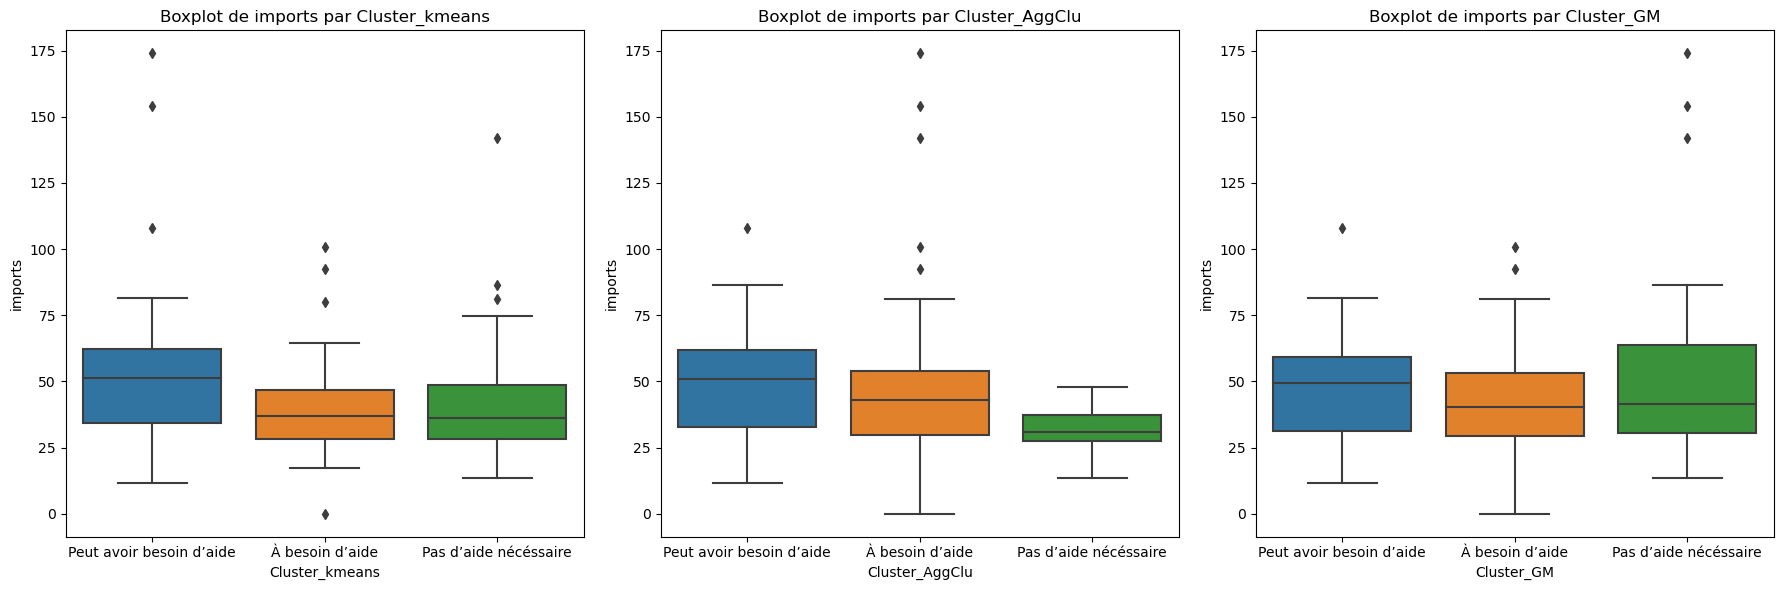

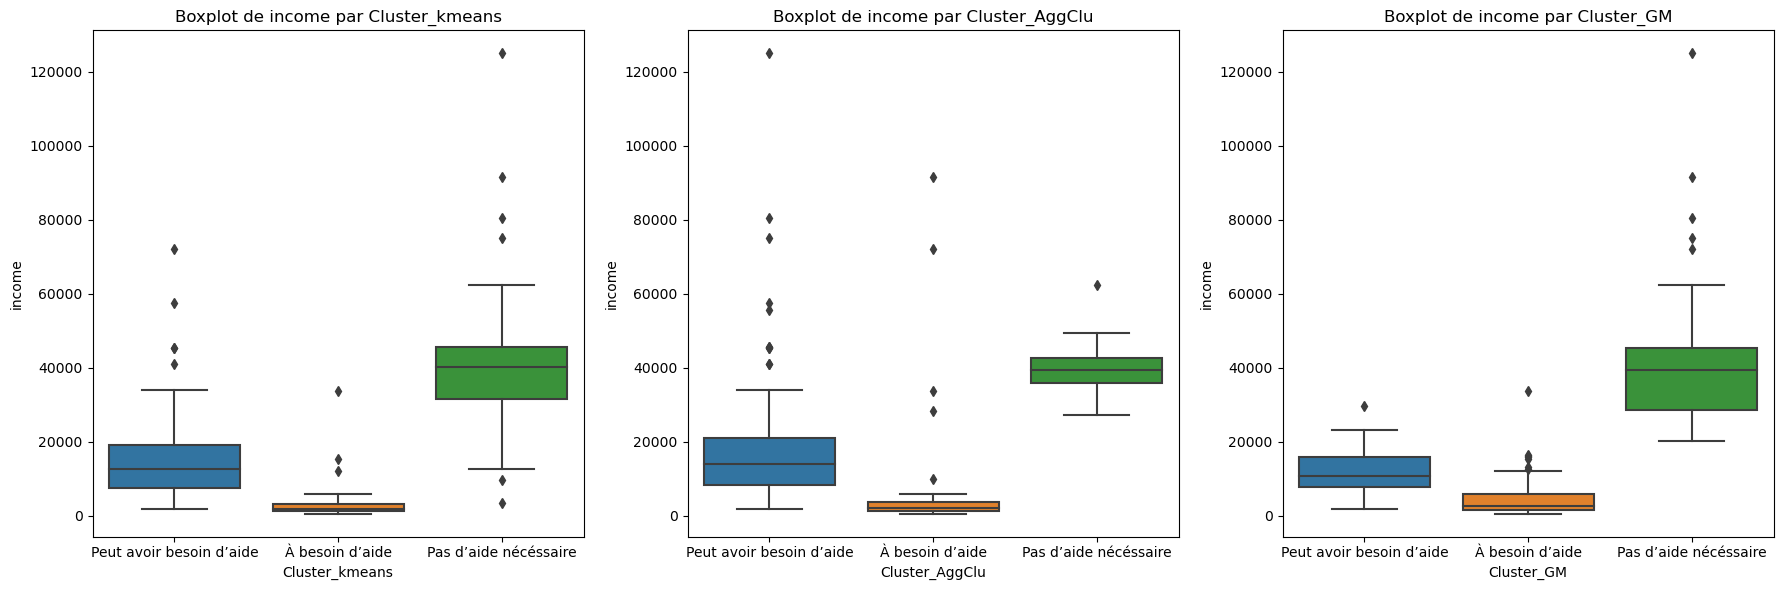

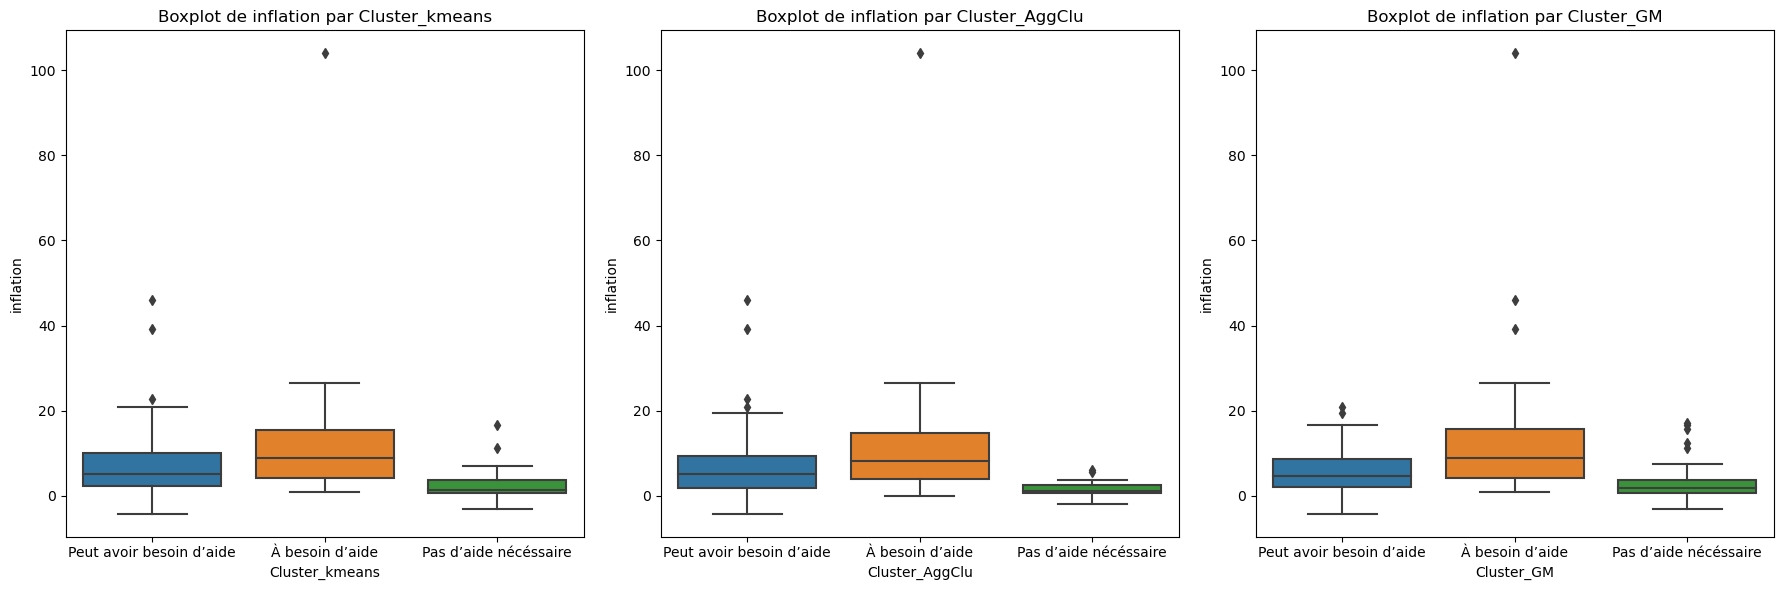

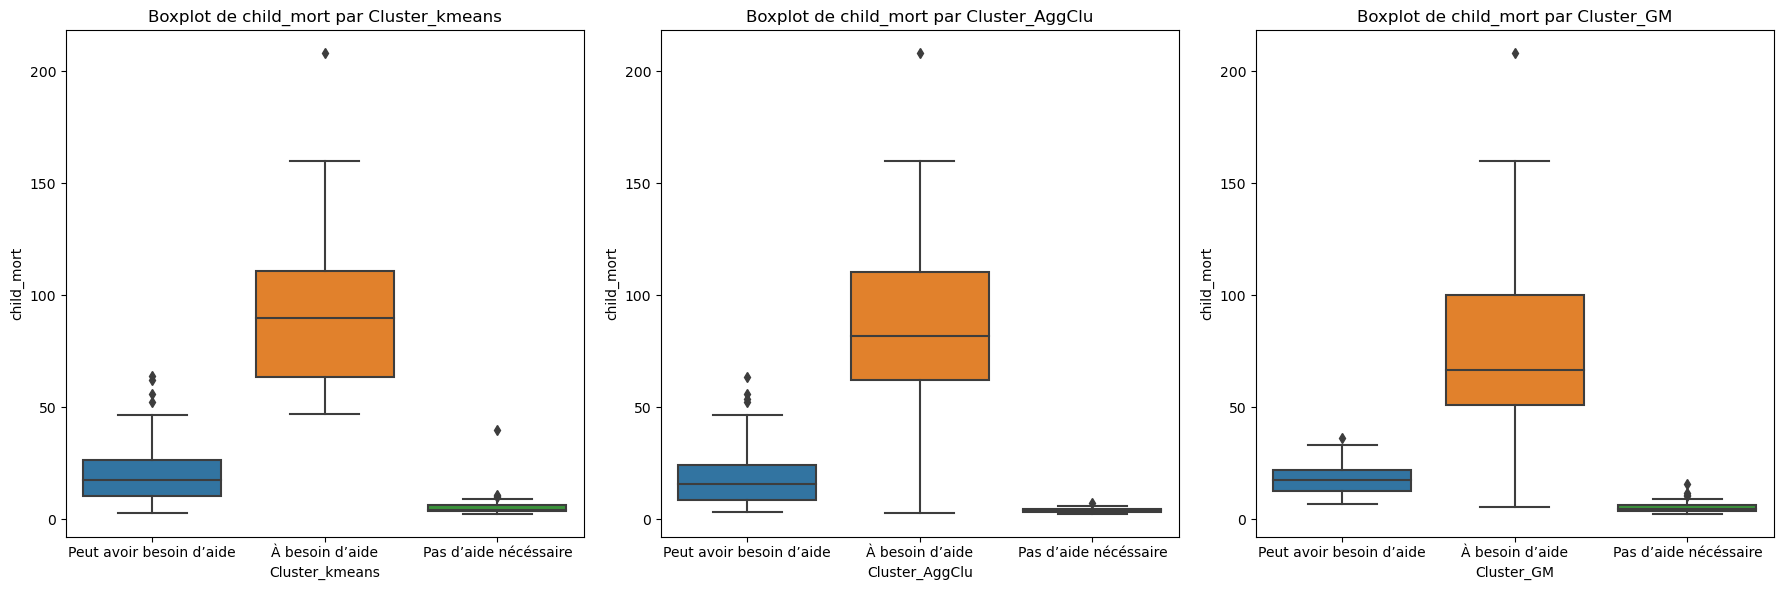

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes de cluster
cluster_columns = ['Cluster_kmeans', 'Cluster_AggClu', 'Cluster_GM']

# Liste des variables à inclure dans le boxplot
variables = ['exports', 'health', 'imports', 'income', 'inflation', 'child_mort']

# Définir l'ordre des clusters
cluster_order = ["Peut avoir besoin d’aide", "À besoin d’aide", "Pas d’aide nécéssaire"]

# Parcourir les variables
for var in variables:
    # Créer un sous-tracé pour chaque variable
    fig, axes = plt.subplots(nrows=1, ncols=len(cluster_columns), figsize=(18, 6))
    
    # Parcourir les colonnes de cluster et tracer les boxplots pour chaque cluster en fonction de la variable
    for i, col in enumerate(cluster_columns):
        sns.boxplot(x=col, y=var, data=df_results, ax=axes[i], order=cluster_order)
        axes[i].set_title(f'Boxplot de {var} par {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(var)
    
    plt.tight_layout()
    plt.show()
